In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 9.5 MB/s eta 0:00:00


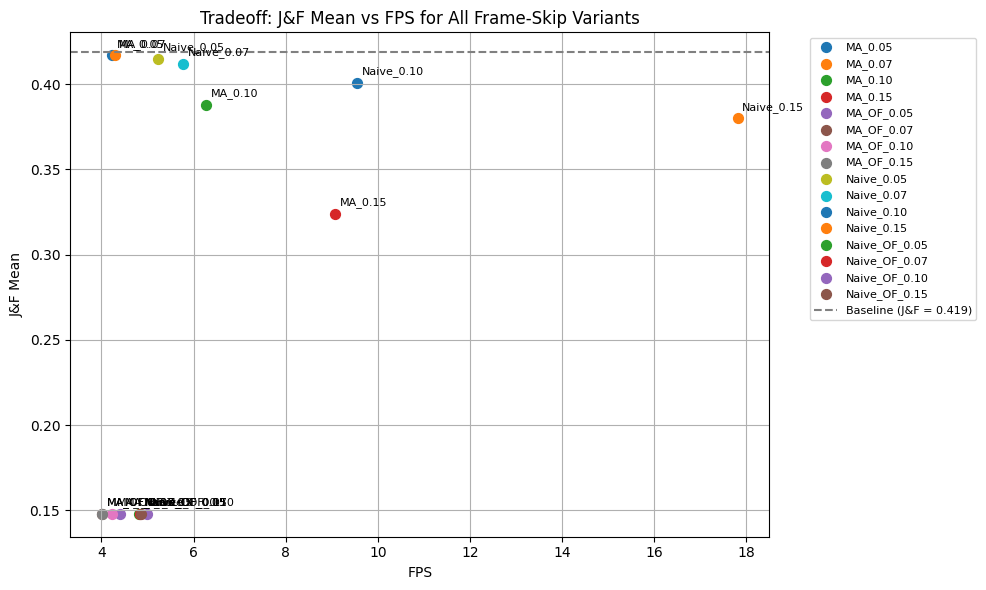

In [2]:
import matplotlib.pyplot as plt

# Data: FPS values from earlier
fps_data = {
    'MA_0.05': 4.23,
    'MA_0.07': 4.29,
    'MA_0.10': 6.28,
    'MA_0.15': 9.07,
    'MA_OF_0.05': 4.40,
    'MA_OF_0.07': 4.01,
    'MA_OF_0.10': 4.23,
    'MA_OF_0.15': 4.02,
    'Naive_0.05': 5.23,
    'Naive_0.07': 5.77,
    'Naive_0.10': 9.55,
    'Naive_0.15': 17.81,
    'Naive_OF_0.05': 4.82,
    'Naive_OF_0.07': 4.84,
    'Naive_OF_0.10': 5.00,
    'Naive_OF_0.15': 4.85
}

# Accuracy (J&F mean) values from provided table
jf_data = {
    'Baseline': 0.419,
    'MA_0.05': 0.417,
    'MA_0.07': 0.417,
    'MA_0.10': 0.388,
    'MA_0.15': 0.324,
    'MA_OF_0.05': 0.148,
    'MA_OF_0.07': 0.148,
    'MA_OF_0.10': 0.148,
    'MA_OF_0.15': 0.148,
    'Naive_0.05': 0.415,
    'Naive_0.07': 0.412,
    'Naive_0.10': 0.401,
    'Naive_0.15': 0.380,
    'Naive_OF_0.05': 0.148,
    'Naive_OF_0.07': 0.148,
    'Naive_OF_0.10': 0.148,
    'Naive_OF_0.15': 0.148
}

# Plotting J&F vs FPS scatter
plt.figure(figsize=(10, 6))

# Plot each point
for key in fps_data:
    plt.scatter(fps_data[key], jf_data[key], label=key, s=50)

# Annotate each point
for key in fps_data:
    plt.text(fps_data[key] + 0.1, jf_data[key] + 0.005, key, fontsize=8)

# Baseline reference line (accuracy only, no FPS)
plt.axhline(y=jf_data['Baseline'], color='gray', linestyle='--', label='Baseline (J&F = 0.419)')

plt.title('Tradeoff: J&F Mean vs FPS for All Frame-Skip Variants')
plt.xlabel('FPS')
plt.ylabel('J&F Mean')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()


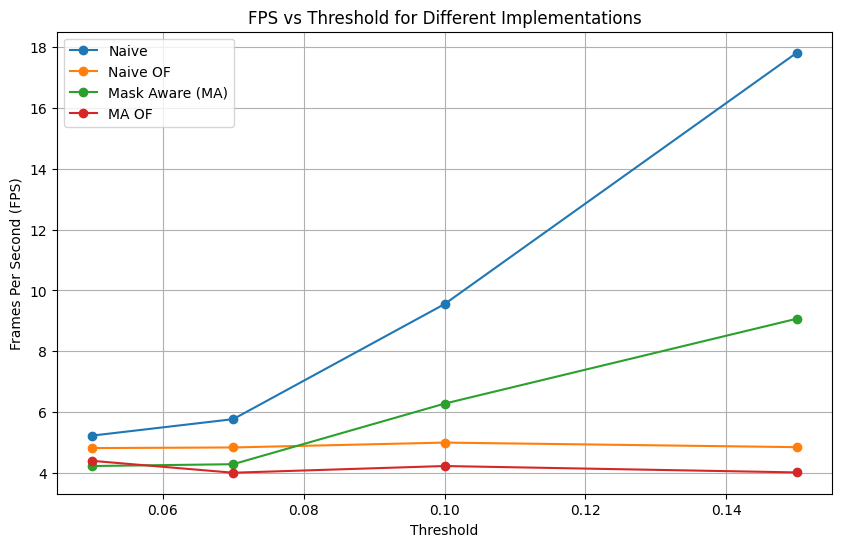

In [3]:
import matplotlib.pyplot as plt

# Data
thresholds = [0.05, 0.07, 0.10, 0.15]

fps_naive = [5.23, 5.77, 9.55, 17.81]
fps_naive_of = [4.82, 4.84, 5.0, 4.85]
fps_ma = [4.23, 4.29, 6.28, 9.07]
fps_ma_of = [4.40, 4.01, 4.23, 4.02]

# Plotting FPS vs Threshold for each model
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fps_naive, marker='o', label='Naive')
plt.plot(thresholds, fps_naive_of, marker='o', label='Naive OF')
plt.plot(thresholds, fps_ma, marker='o', label='Mask Aware (MA)')
plt.plot(thresholds, fps_ma_of, marker='o', label='MA OF')

# Styling
plt.title('FPS vs Threshold for Different Implementations')
plt.xlabel('Threshold')
plt.ylabel('Frames Per Second (FPS)')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


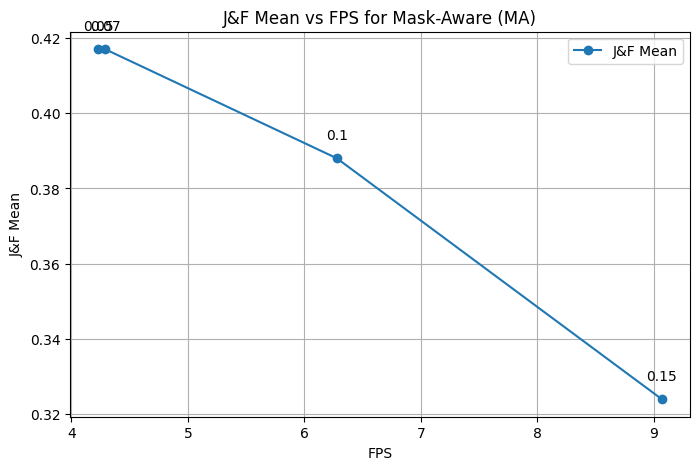

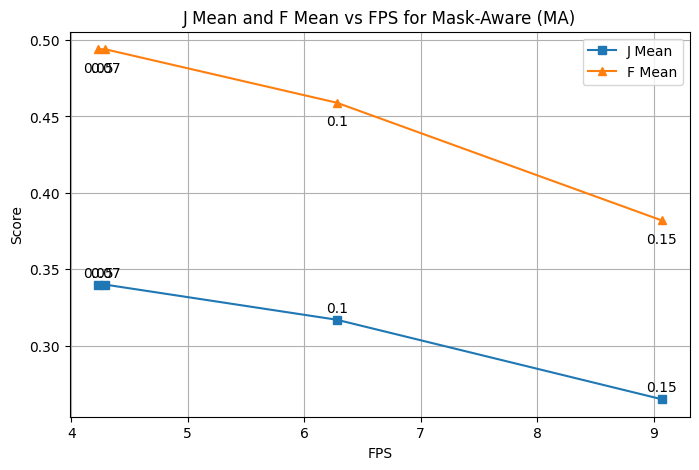

In [4]:
import matplotlib.pyplot as plt

# Data for Mask-Aware (MA) at different thresholds
thresholds = [0.05, 0.07, 0.10, 0.15]
fps_ma = [4.23, 4.29, 6.28, 9.07]
jf_mean = [0.417, 0.417, 0.388, 0.324]
j_mean = [0.340, 0.340, 0.317, 0.265]
f_mean = [0.494, 0.494, 0.459, 0.382]

# Plot J&F mean vs FPS
plt.figure(figsize=(8, 5))
plt.plot(fps_ma, jf_mean, marker='o', label='J&F Mean')
for i, th in enumerate(thresholds):
    plt.text(fps_ma[i], jf_mean[i]+0.005, f'{th}', ha='center')

plt.title('J&F Mean vs FPS for Mask-Aware (MA)')
plt.xlabel('FPS')
plt.ylabel('J&F Mean')
plt.grid(True)
plt.legend()

# Plot J mean and F mean vs FPS
plt.figure(figsize=(8, 5))
plt.plot(fps_ma, j_mean, marker='s', label='J Mean')
plt.plot(fps_ma, f_mean, marker='^', label='F Mean')
for i, th in enumerate(thresholds):
    plt.text(fps_ma[i], j_mean[i]+0.005, f'{th}', ha='center')
    plt.text(fps_ma[i], f_mean[i]-0.015, f'{th}', ha='center')

plt.title('J Mean and F Mean vs FPS for Mask-Aware (MA)')
plt.xlabel('FPS')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

# Display the plots
plt.show()
